In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df=pd.read_csv("Apple/AppleStore.csv")

In [3]:
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


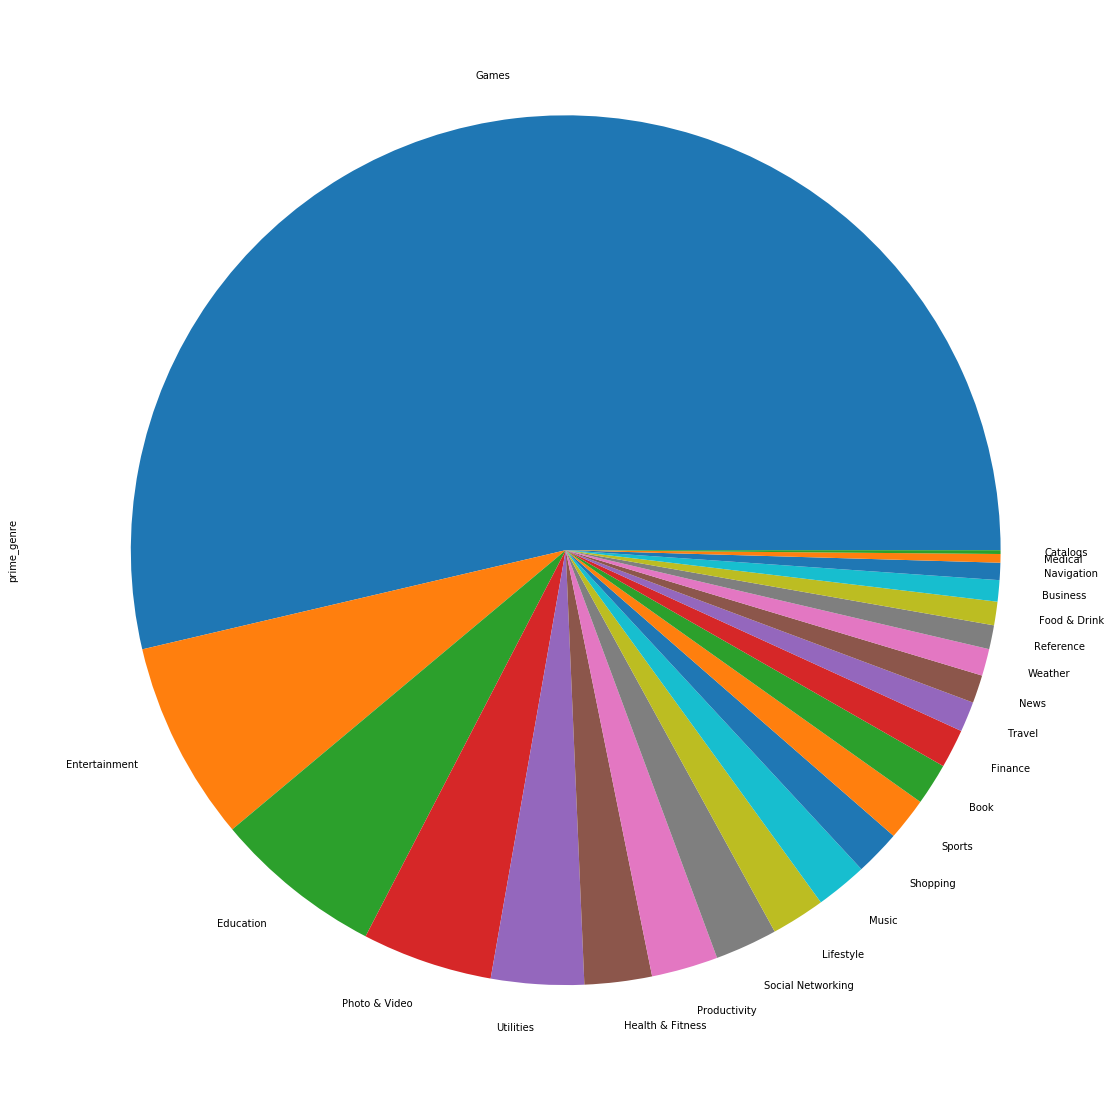

<Figure size 432x288 with 0 Axes>

In [5]:
names=df.groupby('prime_genre')['prime_genre'].count().sort_values(ascending=False)
names
names.plot.pie( figsize=(20, 20),fontsize=10)
plt.show()
plt.savefig('prime_genre.png')

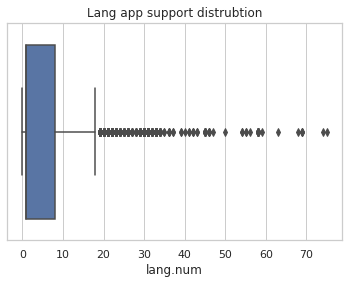

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["lang.num"]).set_title('Lang app support distrubtion')
plt.savefig('lang.num.png')
#####התפלגות שפות

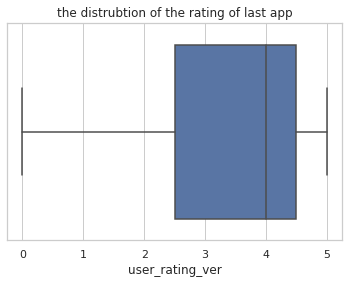

In [7]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["user_rating_ver"]).set_title('the distrubtion of the rating of last app')
plt.savefig('rating_of_last_app.png')


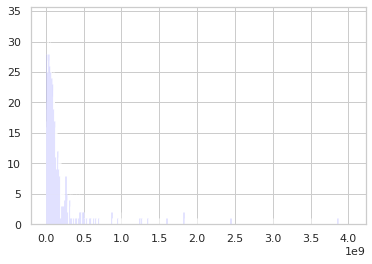

<Figure size 432x288 with 0 Axes>

In [8]:
x = df["size_bytes"]
num_bins = len(df["size_bytes"])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.3)
plt.show()
plt.savefig('size_bytes.png')

#####התפלגות גודל 

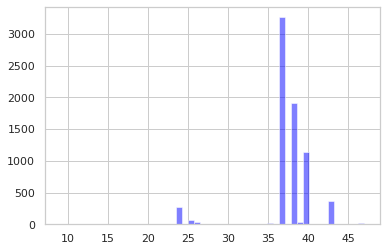

In [9]:
x = df["sup_devices.num"]
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.savefig('sup_devices.num.png')
plt.show()

#####התפלגות המכשירים התומכים

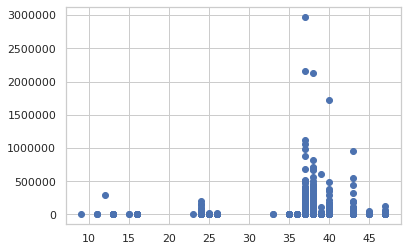

In [10]:

x = df["sup_devices.num"]
y = df["rating_count_tot"]
plt.plot(x, y, "o")
plt.savefig('sup_devices.num-rating-count.png')


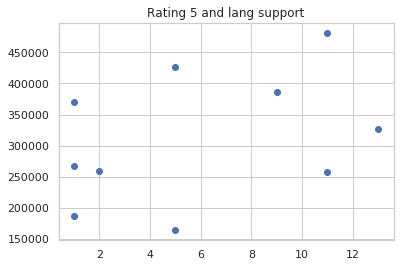

<Figure size 432x288 with 0 Axes>

In [11]:
top_20_rated = df.sort_values(['user_rating','rating_count_tot'],ascending=[False, False]).head(10).drop('Unnamed: 0',axis = 1)
x = top_20_rated['lang.num']
y = top_20_rated['rating_count_tot']
plt.scatter(x, y)
plt.title('Rating 5 and lang support')
plt.show()
plt.savefig('lang.num-rating-count.png')


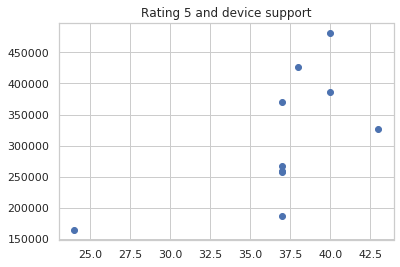

In [12]:
top_20_rated = df.sort_values(['user_rating','rating_count_tot'],ascending=[False, False]).head(10).drop('Unnamed: 0',axis = 1)
x = top_20_rated['sup_devices.num']
y = top_20_rated['rating_count_tot']
plt.scatter(x, y)
plt.title('Rating 5 and device support')
plt.savefig('sup_devices.num-rating_count_tot.png')
plt.show()


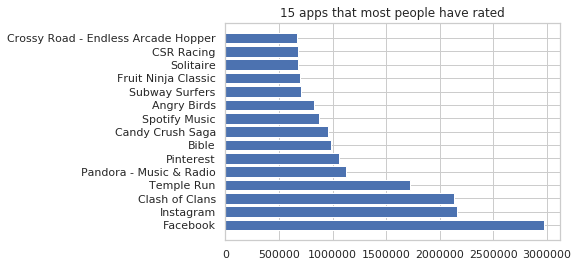

In [13]:
top_15_rated = df.sort_values(['rating_count_tot'],ascending=[False]).head(15).drop('Unnamed: 0',axis = 1)
x = top_15_rated['track_name']
y = top_15_rated['rating_count_tot']
plt.barh(x, y)
plt.title('15 apps that most people have rated')
plt.savefig('15APPMOSTRATED.png')
plt.show()


/home/ravid/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ravid/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


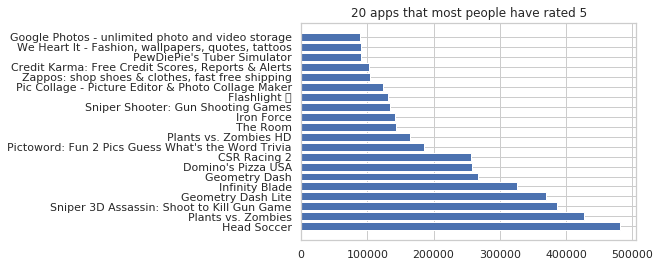

In [14]:
top_20_rated = df.sort_values(['user_rating','rating_count_tot'],ascending=[False, False]).head(20).drop('Unnamed: 0',axis = 1)
x = top_20_rated['track_name']
y = top_20_rated['rating_count_tot']
plt.barh(x, y)
plt.title('20 apps that most people have rated 5')
plt.savefig('20APPMOSTRATED.png')
plt.show()



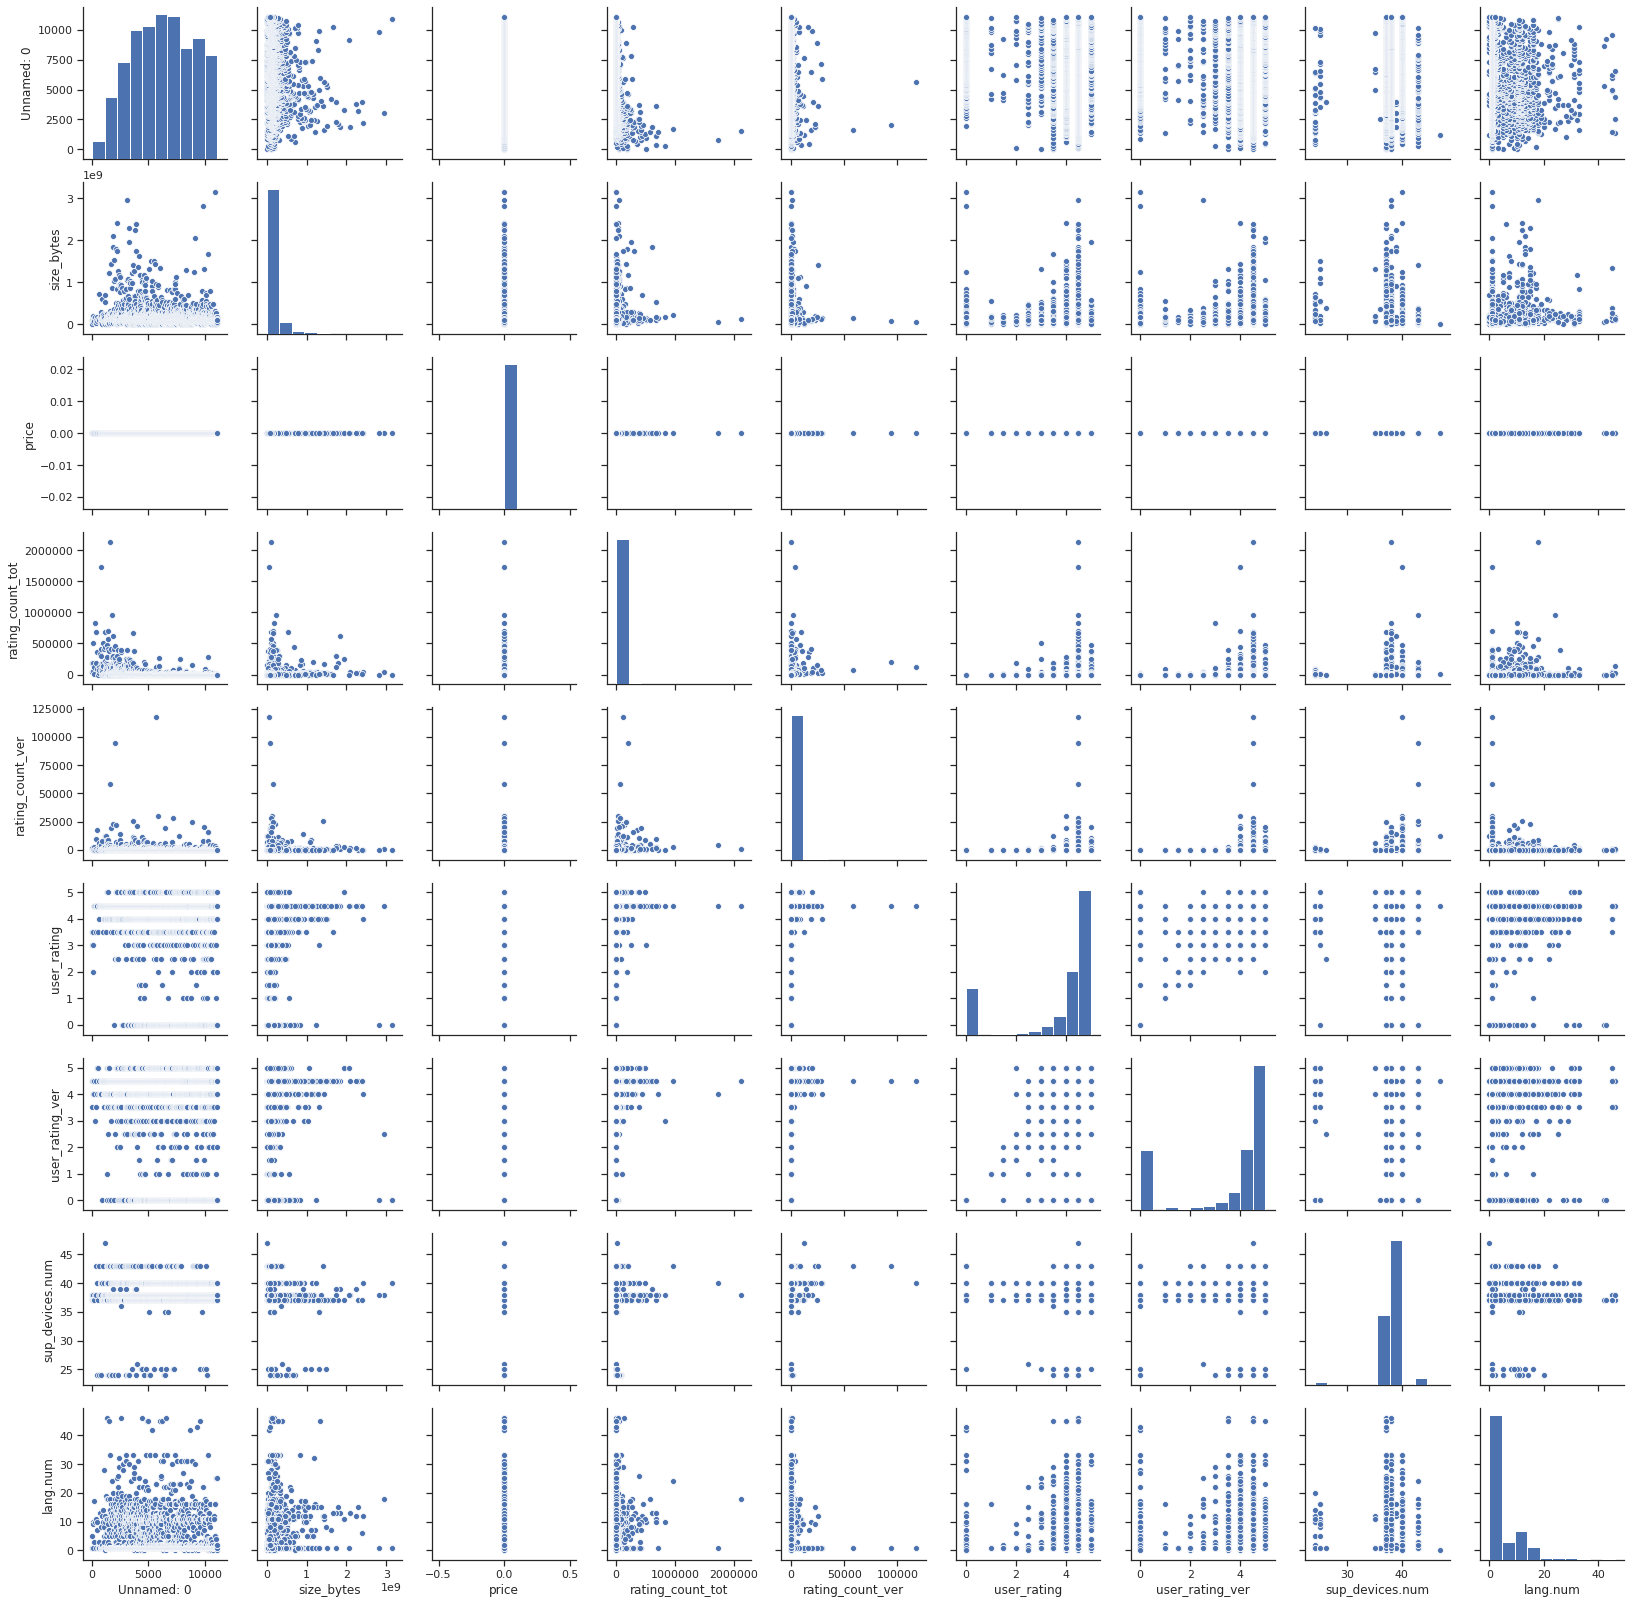

In [15]:
sns.set(style="ticks", color_codes=True)
freegames=df[(df['prime_genre'] == 'Games') & (df['price'] == 0)]
g = sns.pairplot(data=freegames, dropna=True)
plt.savefig('FREEGAMES.png')


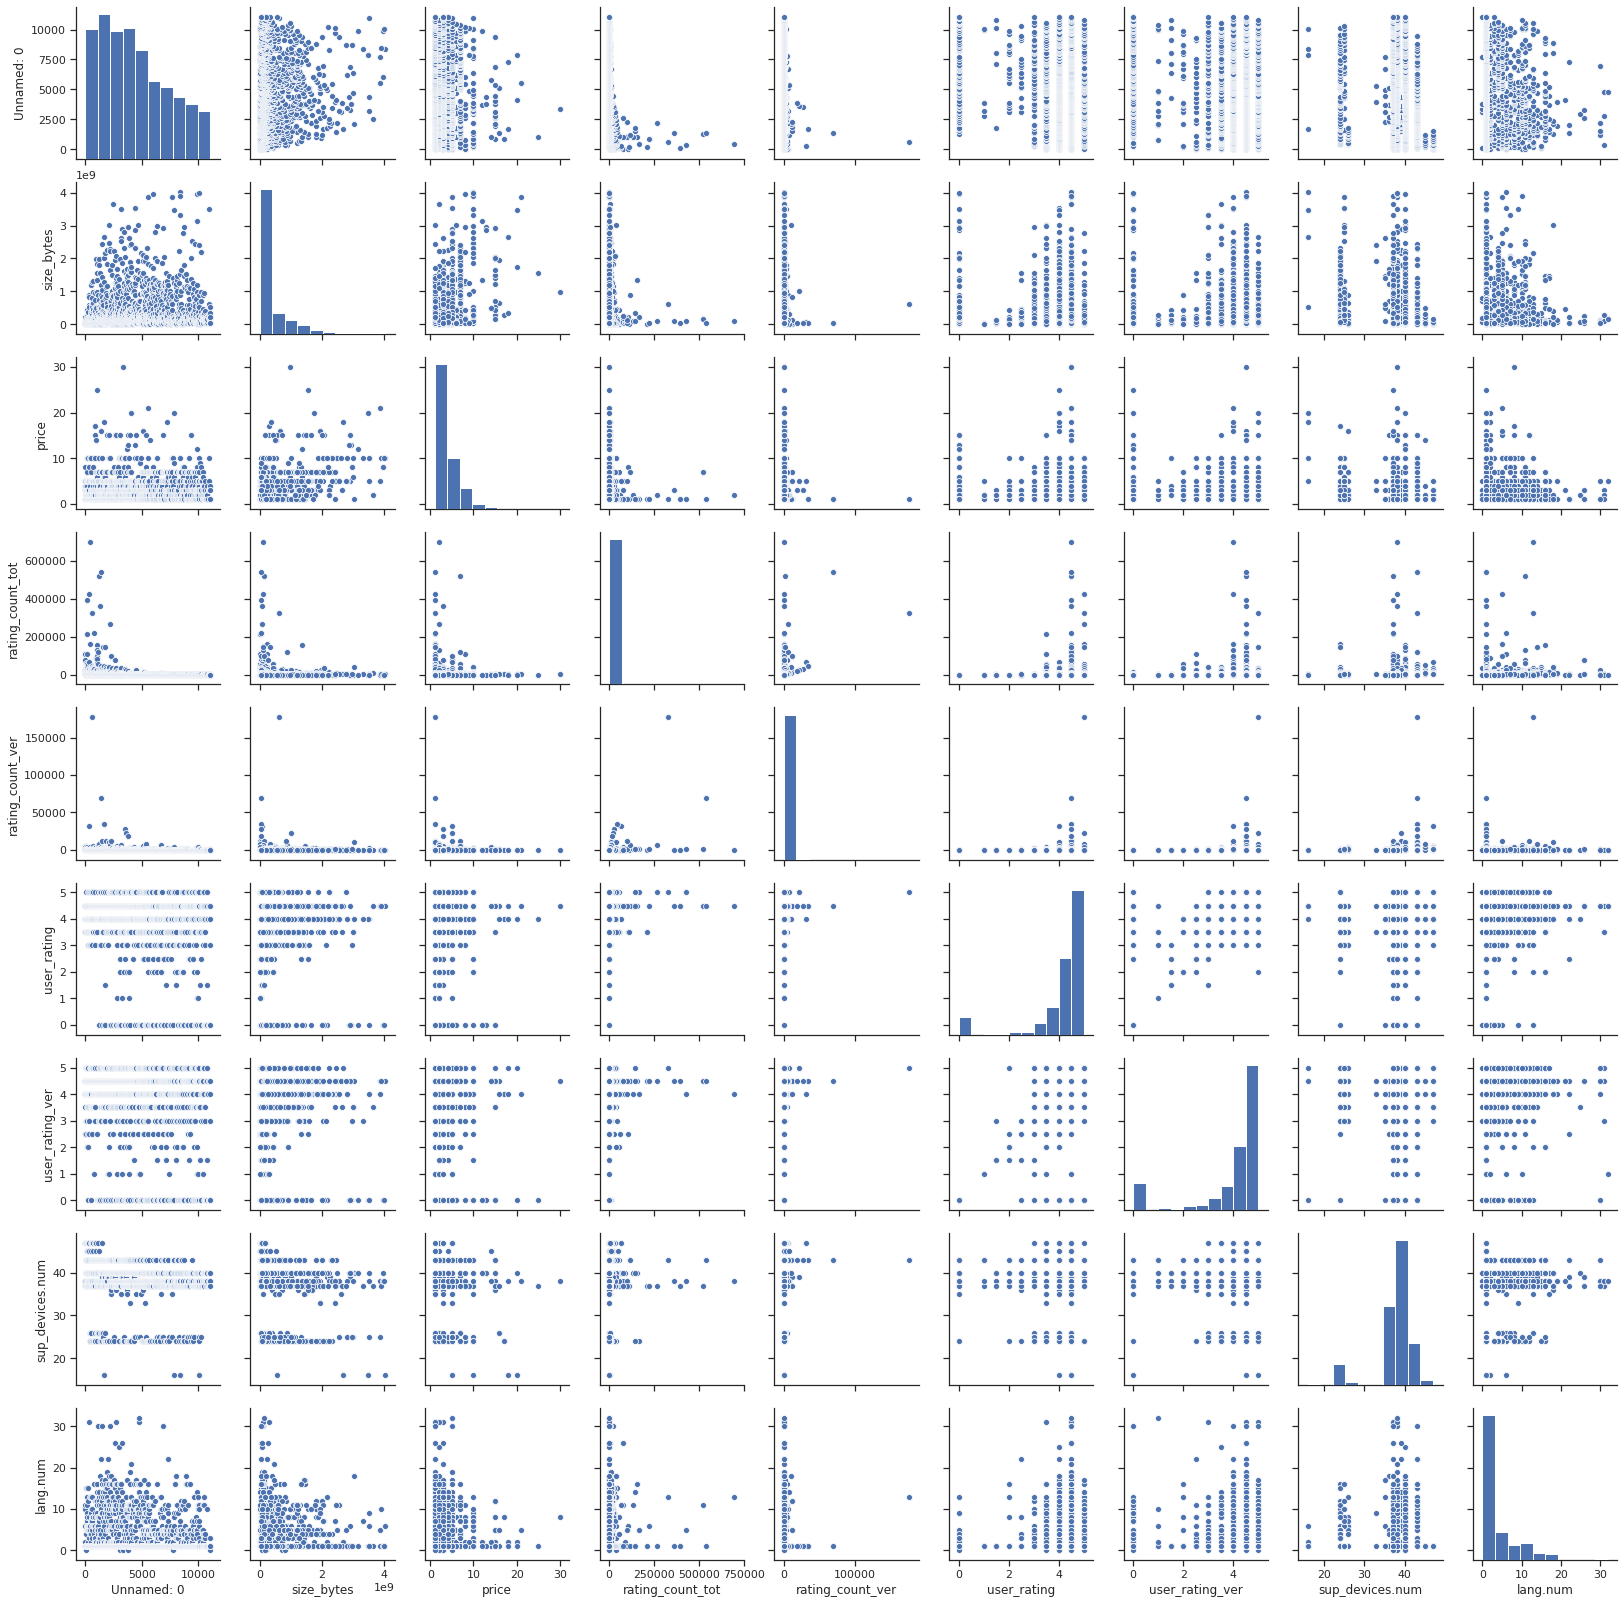

In [16]:
nonefreegames=df[(df['prime_genre'] == 'Games') & (df['price'] > 0)]
nonefree = sns.pairplot(data=nonefreegames, dropna=True)
plt.savefig('notFREEGAMES.png')


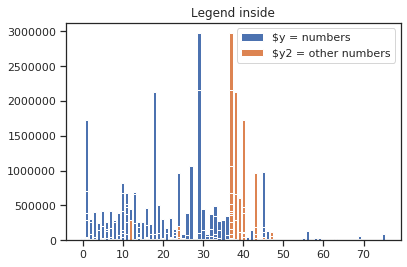

<Figure size 432x288 with 0 Axes>

In [17]:
x = df['lang.num']

y = df['rating_count_tot']
x2 = df['sup_devices.num']

y2 = df['rating_count_tot']
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, y, label='$y = numbers')
ax.bar(x2, y2, label='$y2 = other numbers')
plt.title('Legend inside')
ax.legend()
plt.show()
plt.savefig('lang.num_sup-devices_rating.png')
